In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from clustering.kmesar import KMESAR

In [2]:
X, y = make_blobs(n_samples=2000, n_features=2, centers=6)
df = pd.DataFrame(X, columns=['x', 'y'])

In [3]:
init_centroids = np.array([[-7.5, -5], [-7.5, -3], [-7.5, 0], [-7.5, 2], [-7.5, 4], [-7.5, 6]])
colors = ['firebrick', 'forestgreen', 'slateblue', 'darkorange', 'm', 'gold', 'lightcoral', 'plum', 'crimson',
          'forestgreen', 'plum', 'indigo']

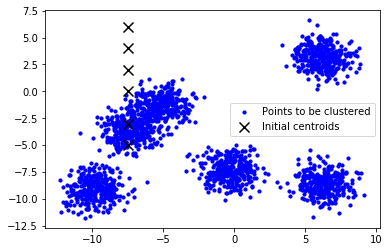

In [4]:
plt.scatter(X[:, 0], X[:, 1], c='blue', s=10, label='Points to be clustered')
plt.scatter(init_centroids[:, 0], init_centroids[:, 1],
            c='black', s=100, marker='x', label='Initial centroids')
plt.legend()

plt.show()

Standardni K-Means

In [5]:
est = KMESAR(k_clusters=6,
             n_init=1,
             init_centroids=init_centroids,
             simulated_annealing_on=False,
             convergence_tracking=True,
             )
est.fit(X)
df['label'] = est.labels_

Text(0.5, 1.0, 'K-Means: n_iter=11, SSE= 1.28e+04')

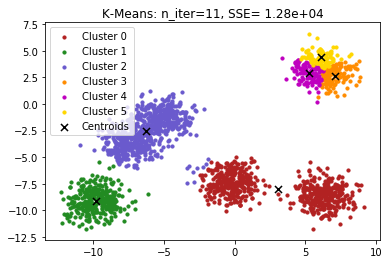

In [6]:
for label in range(est.k_clusters):
    cluster = X[np.where(est.labels_ == label)]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label], s=10, label=f'Cluster {label}')

plt.scatter(est.centroids_[:, 0], est.centroids_[:, 1], c='black', s=50, marker='x', label='Centroids')
plt.legend()
plt.title(est.clustering_plot_title())

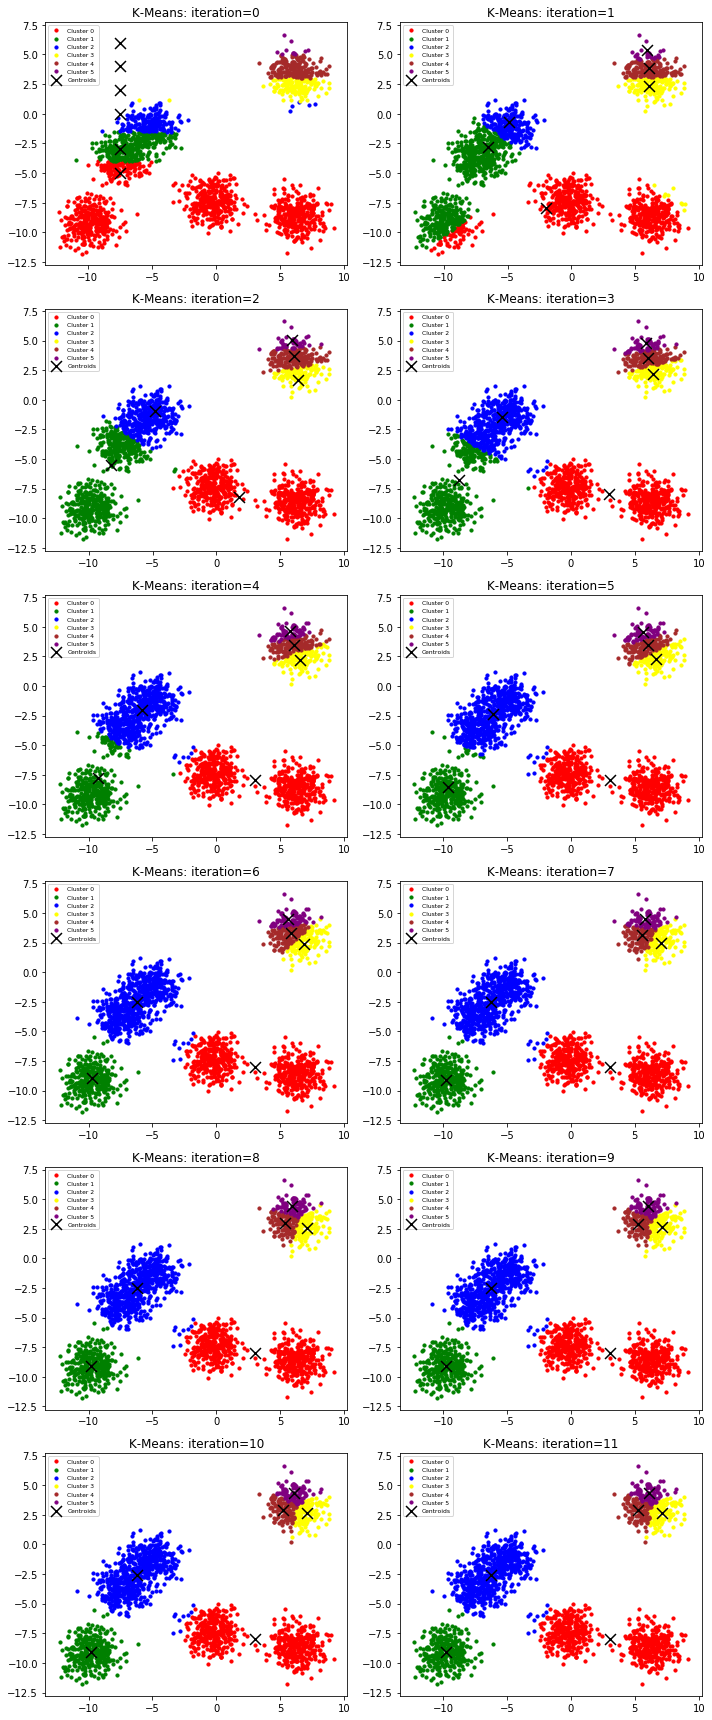

In [7]:
est.plot_tracking_history(X, out_file='K-Means, 6_blobs error')

--------------- Algorithm details ---------------
    * Number of clusters (k): 6
    * Centroid initialization method: random (ignored)
    * Initial centroids (specified): True
    * Number of initialization repetition: 1
    * Maximum iterations: 300
    * Convergence tolerance: 0.001
    * Simulated annealing on: True
    * Annealing method: cluster_other
    * Annealing probability function: recip
    * Annealing probability alpha: 8
    * Annealing weight function: sigmoid
    * Annealing weight beta: 5
    * Convergence tracking: True
    * Annealing tracking: True
-------------------------------------------------


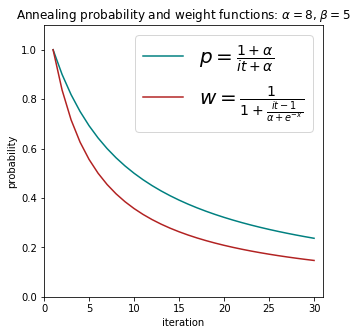

In [17]:
est = KMESAR(k_clusters=6,
             n_init=1,
             init_centroids=init_centroids,
             tol=1e-3,
             annealing_method='cluster_other',
             annealing_prob_function='recip',
             alpha=8,
             annealing_weight_function='sigmoid',
             beta=5,
             convergence_tracking=True,
             annealing_tracking=True
             )

print(est.algorithm_details())
est.plot_annealing_functions()

------------- KMESAR clustering -------------
    * Iterations before convergence: 46
    * Total annealings: 105
    * Sum of squared error:  3.97e+03
    * Time elapsed: 2s 625ms
 ---------------------------------------------


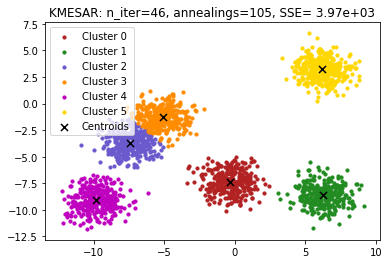

In [18]:
est.fit(X)
df['label'] = est.labels_

for label in range(est.k_clusters):
    cluster = X[np.where(est.labels_ == label)]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label], s=10, label=f'Cluster {label}')

plt.scatter(est.centroids_[:, 0], est.centroids_[:, 1], c='black', s=50, marker='x', label='Centroids')
plt.legend()
plt.title(est.clustering_plot_title())

print(est.clustering_info())

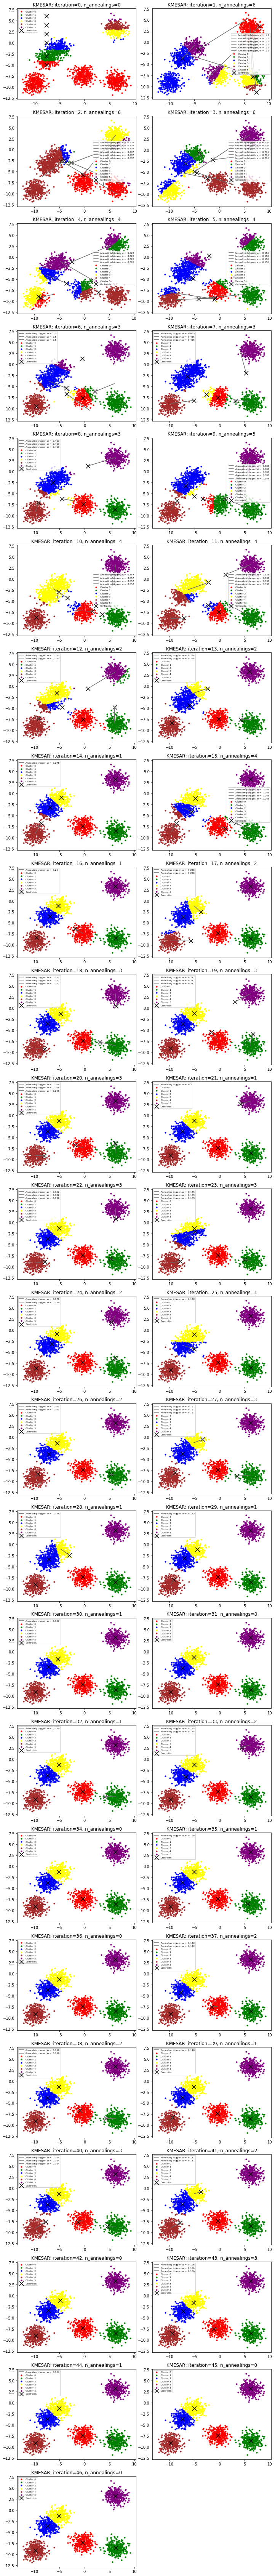

In [19]:
est.plot_tracking_history(X, out_file='KMESAR, 6_blobs, a_method=cluster_other, a_prob=recip, a_weight=sigmoid')